In [4]:
pip install tensorflow numpy matplotlib


In [52]:
from google.colab import files
from IPython.display import display, Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [77]:
uploaded = files.upload()


Saving black_marker.jpg to black_marker (1).jpg



Uploaded files:
- black_marker.jpg


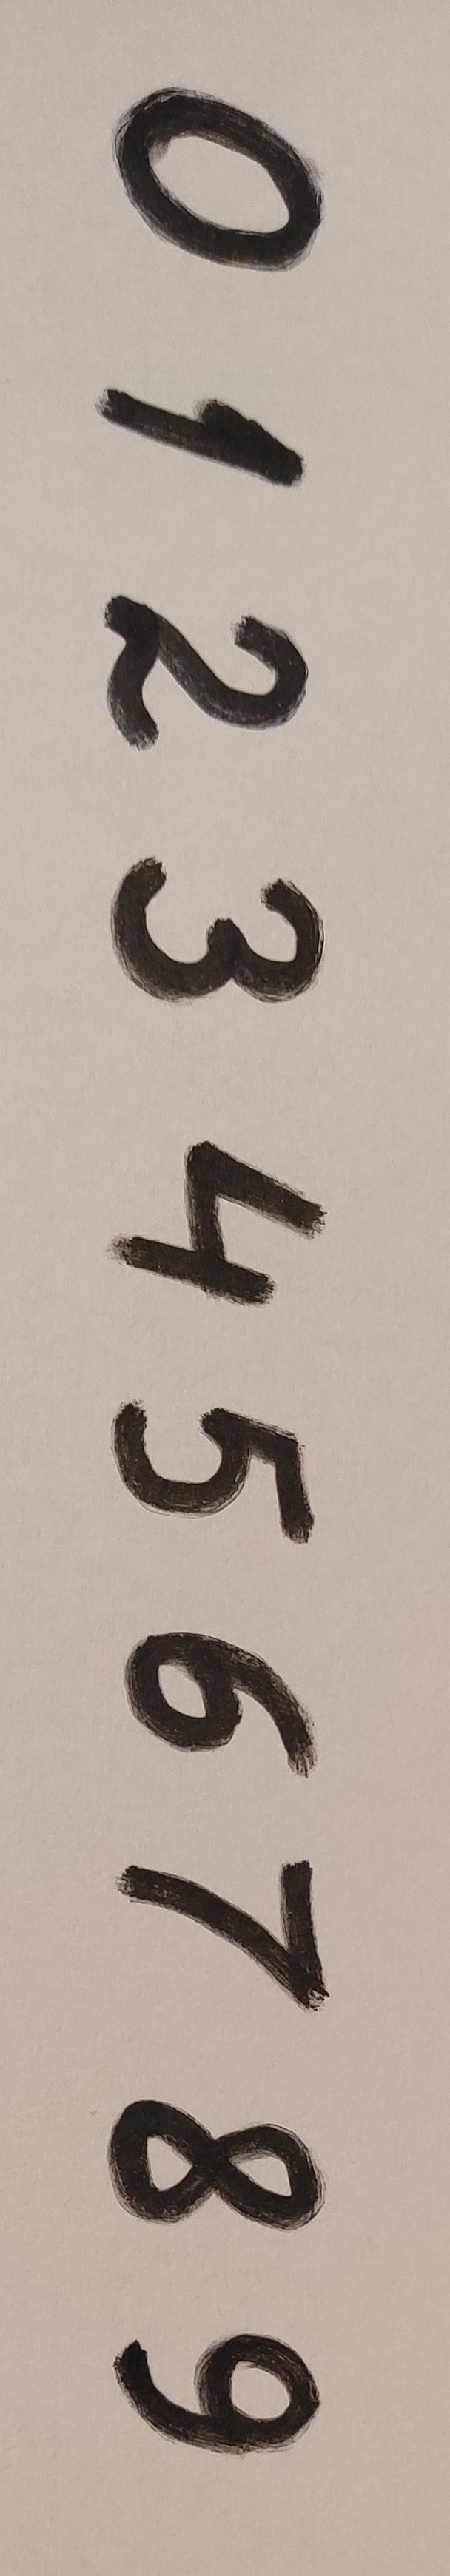

In [56]:
print("\nUploaded files:")
for filename in uploaded.keys():
    print(f"- {filename}")
    display(Image(filename=filename))

In [57]:
def process_image(file_bytes):
    img = cv2.imdecode(np.frombuffer(file_bytes, np.uint8), cv2.IMREAD_GRAYSCALE)

    # Debug original
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")

    # Preprocessing
    img = 255 - img  # Invert colors
    _, img = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)
    img = cv2.resize(img, (28, 28))
    img = img.astype('float32') / 255.0

    # Debug processed
    plt.subplot(1,2,2)
    plt.imshow(img, cmap='gray')
    plt.title("Processed")
    plt.show()

    return img.reshape(1, 28, 28, 1)

In [62]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

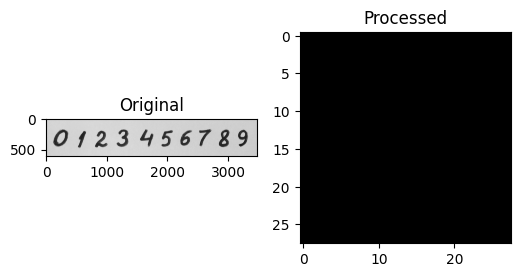

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Prediction for black_marker.jpg:
Digit: 6 (Confidence: 47.44%)
Top predictions:
0: 0.65%
1: 0.60%
2: 4.02%
3: 14.05%
4: 0.42%
5: 1.38%
6: 47.44%
7: 18.76%
8: 11.04%
9: 1.63%


In [64]:
for filename, file_bytes in uploaded.items():
    try:
        processed_img = process_image(file_bytes)
        prediction = model.predict(processed_img)
        digit = np.argmax(prediction)
        confidence = np.max(prediction)

        print(f"\nPrediction for {filename}:")
        print(f"Digit: {digit} (Confidence: {confidence:.2%})")
        print("Top predictions:")
        for i, prob in enumerate(prediction[0]):
            print(f"{i}: {prob:.2%}")

    except Exception as e:
        print(f"\nError processing {filename}: {str(e)}")